In [4]:
# Basic set-up
import os
import numpy as np
import pandas as pd

# ML toolkits
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.utils.extmath import density
from sklearn.pipeline import make_pipeline

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import pandas as pd

fk = pd.read_csv (r'C:\Users\soura\OneDrive\Desktop\Fake.csv')
tk= pd.read_csv (r'C:\Users\soura\OneDrive\Desktop\True.csv')
print (df)
print(tk)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [10]:
display(fk.head())
display(tk.head())

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [11]:
#1.Importing data & exploration
#2.Data cleaning / Prepping
#3.Feature extraction
#4.Model training
#5.Further exploration
#6.Conclusion

In [12]:
#Looks like a simple dataset that contains four columns, namely the article's title, the actual body of text, the subject, and date. There may not even be that much data cleaning to do, given how simple the dataset is!

In [13]:
display(fk.info())
print('\n')
display(tk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


None



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


None

In [14]:
display(fk.subject.value_counts())
print('\n')
display(tk.subject.value_counts())

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [19]:
#2. Data Cleaning / Prepping
#Hmmm... it looks like the subject column is perhaps too informative -- there are clearly no overlapping "subjects" between fake and true news articles. Since I want to build a model that can differentiate fake vs. true news based on its content, I will drop this column.

#Moreover, the best way to train the model on both fake and true news data will be to use concatenate two kinds, and shuffle them. I should first add labels to make sure we know which ones are which.

In [20]:
fk['label'] = 'fake'
tk['label'] = 'real'

In [21]:
data = pd.concat([fk, tk], axis=0)
data = data.sample(frac=1).reset_index(drop=True)
data.drop('subject', axis=1)

,title,text,date,label
0,Senate panel approves Myanmar nominee,WASHINGTON (Reuters) - A U.S. Senate committee...,"January 28, 2016",real
1,SECURITY NIGHTMARE? TRUMP’S “MAR-A-LAGO”… A Tr...,,"Nov 24, 2016",fake
2,Bernie Sanders Sends A Loud And Clear Message...,"Over the last few months, Donald Trump has bee...","May 12, 2016",fake
3,"Report: After Millions Promised, Trump Gave B...","While he s a lot wealthier, Donald Trump is no...","June 28, 2016",fake
4,Hezbollah says Saudi Arabia forced Lebanon PM ...,BEIRUT (Reuters) - The leader of Lebanese Shi ...,"November 5, 2017",real
...,...,...,...,...
44893,Trump loses bid to end Trump University lawsui...,SAN FRANCISCO (Reuters) - A U.S. judge on Tues...,"August 2, 2016",real
44894,Hillary Clinton also wants Britain to stay in ...,LONDON/WASHINGTON (Reuters) - U.S. Democratic ...,"April 23, 2016",real
44895,Trump order paves way for agencies to weaken h...,WASHINGTON (Reuters) - President Donald Trump ...,"January 21, 2017",real
44896,RACHEL MADDOW Tries To Embarrass Trump By Expo...,Here s Maddow s tweet announcing her bombshel...,"Mar 14, 2017",fake


In [22]:
#Now I can split up our dataset into training vs. test dataset.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.25)
display(X_train.head())
print('\n')
display(y_train.head())

print("\nThere are {} documents in the training data.".format(len(X_train)))

18354    NEW YORK/WASHINGTON (Reuters) - President-elec...
32393    CHILPANCINGO, Mexico (Reuters) - A protest by ...
8965     Donald Trump s favorite morning propaganda pro...
36457    ROME (Reuters) - A Libyan coast guard vessel f...
44060    While the media salivates over the illegal rel...
Name: text, dtype: object

18354    real
32393    real
8965     fake
36457    real
44060    fake
Name: label, dtype: object


There are 33673 documents in the training data.


In [24]:
#3. Feature extraction
#Before getting into the actual feature extraction, I want to add some explanations to the method that was used here and why. This may be the most text-heavy section, but I believe it's also crucial to be able to reason the use of your choice of methodology, so please bear with me! But if you so wish, you could also just skip to the "TL;DR" below.

In [26]:
"""
Some terms to know when dealing with... terms
Among a few common ways of extracting numerical features from text are tokenizing, counting occurrence, and tf-idf term weighting; I've chosen tf-idf term weighting here as the feature to extract from these text.

(1) Term frequency
The first portion of this method, "tf", refers to the term frequency, which simply indicates how often terms can be found in documents. Tf's alone are often insufficient as features, however; since there are many commonly-used words such as "is", "are", "the", etc. that do not carry much information about the document, we do not want to weigh these terms as heavily as other more rare but more informative terms. These uninformative terms are actually referred to as stop words, and are often cleaned out during data cleansing/feature extraction steps as they do not hold much value in enhancing the model's ability to predict information.

(2) Inverse document frequency
This is where the "idf", short for inverse document frequency, comes into play. Idf is used to penalize such terms that occur commonly across different contexts without adding interesting information. The exact equation for computing inverse document frequency is:

idf(t)=log1+n1+df(t)+1.
 
Here,  n  represents the total number of documents,  t  represents the term in question,  df(t)  represents the document frequency of that term; i.e., the number of documents within the set of documents that contain that term. As one can imagine, for common terms such as "is", "are", etc.,  idf(t)  will most likely be 1, since all documents are highly likely to contain them (thus,  df(t)=n ). On the other hand, the less often a term occurs across different documents, the smaller the denominator will be, making the fraction bigger and in turn,  idf(t)  bigger.

(3) Tf-idf
Finally, tf-idf is the product of term-frequency and inverse document frequency, mathematically computed as:

tf−idf(t,d)=tf(t,d)∗idf(t).
 
Where in addition to notations used above,  d  represents a document. The more commonly the word appears, the greater the value of tf will be, but if this is the case across different documents, it will be penalized with a small idf. On the other hand, a rarely-occurring word might have a smaller value of tf, but be highlighted by bigger idf values for not occurring often in different documents.

TL;DR
Tf-idf term weighting lets you assign importance to tokens that actually carry some information by balancing overall token frequency with its frequency across documents.

Below, I first initialize a TfidfVectorizer object. It takes as input the set of document strings and outputs the normalized tf-idf vectors; then, using fit_transform like any other transformers and predictors in scikit-learn, we can fit the vectorizer to data and tranform them. It has an option to use the max_df to indicate the cut-off document-frequency for stop words, if being used. Here, I will set the cut-off document-frequency to be 0.7, which is the lowest possible value that this parameter can take. The final output of fitting & transforming data will give a sparse matrix with the size of n_samples by n_features, i.e., number of documents by number of unique words.



"""

'#\nSome terms to know when dealing with... terms\nAmong a few common ways of extracting numerical features from text are tokenizing, counting occurrence, and tf-idf term weighting; I\'ve chosen tf-idf term weighting here as the feature to extract from these text.\n\n(1) Term frequency\nThe first portion of this method, "tf", refers to the term frequency, which simply indicates how often terms can be found in documents. Tf\'s alone are often insufficient as features, however; since there are many commonly-used words such as "is", "are", "the", etc. that do not carry much information about the document, we do not want to weigh these terms as heavily as other more rare but more informative terms. These uninformative terms are actually referred to as stop words, and are often cleaned out during data cleansing/feature extraction steps as they do not hold much value in enhancing the model\'s ability to predict information.\n\n(2) Inverse document frequency\nThis is where the "idf", short fo

In [27]:
my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)

# fit the vectorizer and transform X_train into a tf-idf matrix,
# then use the same vectorizer to transform X_test
tfidf_train = my_tfidf.fit_transform(X_train)
tfidf_test = my_tfidf.transform(X_test)

tfidf_train

<33673x108512 sparse matrix of type '<class 'numpy.float64'>'
	with 5128993 stored elements in Compressed Sparse Row format>

In [28]:
#As expected, we see that there are as many rows as the number of documents, and we have extracted over a hundred thousand features, or tokens.

In [29]:
#4. Model training

In [30]:
#The model I've chosen to use is the Passive-Aggressive (PA) Classifier (see original paper here). In essence, the PA classifier is an algorithm that only updates its weights ("aggressive" action) when it encounters examples for which its predictions are wrong, but otherwise remains unchanged ("passive" action).

In [31]:
#Now, let's instantiate the PassiveAggressiveClassifier and train it with our features.

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_clf = PassiveAggressiveClassifier(max_iter=50)
pa_clf.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [33]:
#Finally, we can implement the same algorithm to the test dataset and see how well it performs!

The accuracy of prediction is 99.38%.

The F1 score is 0.994.



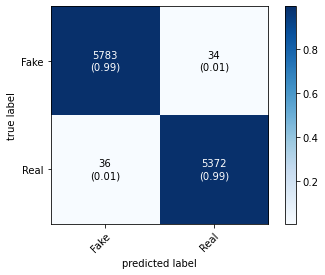

In [37]:
from mlxtend.plotting import plot_confusion_matrix
y_pred = pa_clf.predict(tfidf_test)

conf_mat = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat,
                      show_normed=True, colorbar=True,
                      class_names=['Fake', 'Real'])

accscore = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test,y_pred,pos_label='real')

print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
print('The F1 score is {:.3f}.\n'.format(f1score))

In [36]:
pip install mlxtend

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [38]:
#Amazing! The model does a very good job predicting whether the news is real or fake, with 99% accuracy; it has a phenomenal F1 score as well, scoring 0.993.

In [39]:
#5. Further exploration

In [40]:
# Dimensionality and density of features

print("Dimensionality (i.e., number of features): {:d}".format(pa_clf.coef_.shape[1]))
print("Density (i.e., fraction of non-zero elements): {:.3f}".format(density(pa_clf.coef_)))

Dimensionality (i.e., number of features): 108512
Density (i.e., fraction of non-zero elements): 0.516


In [41]:
#Out of the features identified, the algorithm found that a little less than half of them were not useful in determining the realness of the article. What does the rest of them look like?

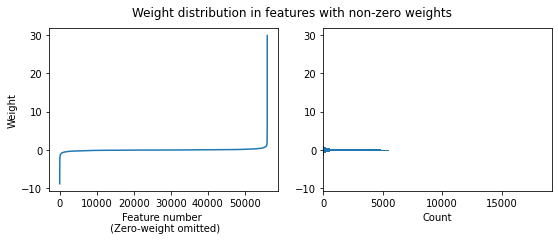

In [42]:
# Sort non-zero weights
weights_nonzero = pa_clf.coef_[pa_clf.coef_!=0]
feature_sorter_nonzero = np.argsort(weights_nonzero)
weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]

# Plot
fig, axs = plt.subplots(1,2, figsize=(9,3))

sns.lineplot(data=weights_nonzero_sorted, ax=axs[0])
axs[0].set_ylabel('Weight')
axs[0].set_xlabel('Feature number \n (Zero-weight omitted)')

axs[1].hist(weights_nonzero_sorted,
            orientation='horizontal', bins=500,)
axs[1].set_xlabel('Count')

fig.suptitle('Weight distribution in features with non-zero weights')

plt.show()

In [43]:
#So it appears that even among the features that had non-zero weights, most of them had a value close to zero. This is not surprising; there were close to a hundred thousand tokens; it's very unlikely that a large majority of them would have been much informative for our task. This leads to the next question -- which tokens were actually useful?

In [44]:
#Extracting "Indicator" Tokens

In [45]:
# Sort features by their associated weights
tokens = my_tfidf.get_feature_names()
tokens_nonzero = np.array(tokens)[pa_clf.coef_[0]!=0]
tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

num_tokens = 10
fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

fake_indicator = pd.DataFrame({
    'Token': fake_indicator_tokens,
    'Weight': weights_nonzero_sorted[:num_tokens]
})

real_indicator = pd.DataFrame({
    'Token': real_indicator_tokens,
    'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
})

print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
display(fake_indicator)

print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
display(real_indicator)

The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,read,-8.814226
1,featured,-7.489162
2,image,-7.243388
3,gop,-5.935774
4,just,-5.095745
5,getty,-5.067865
6,com,-4.535167
7,rep,-4.098394
8,sen,-4.094405
9,hillary,-3.974499




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,reuters,29.882817
1,nov,5.546338
2,washington,5.081742
3,wednesday,4.395978
4,thursday,4.216677
5,republican,4.122377
6,tuesday,3.721489
7,statement,3.435051
8,comment,3.421331
9,saying,3.116496


In [50]:
fake_contain_fake = fk.text.loc[[np.any([token in body for token in fake_indicator.Token])
                                for body in fk.text.str.lower()]]
real_contain_real = tk.text.loc[[np.any([token in body for token in real_indicator.Token])
                                for body in tk.text.str.lower()]]

print('Articles that contained any of the matching indicator tokens:\n')

print('FAKE: {} out of {} ({:.2f}%)'
      .format(len(fake_contain_fake), len(fk), len(fake_contain_fake)/len(fk) * 100))
print(fake_contain_fake)

print('\nREAL: {} out of {} ({:.2f}%)'
      .format(len(real_contain_real), len(tk), len(real_contain_real)/len(tk) * 100))
print(real_contain_real)

Articles that contained any of the matching indicator tokens:

FAKE: 21913 out of 23481 (93.32%)
0        Donald Trump just couldn t wish all Americans ...
1        House Intelligence Committee Chairman Devin Nu...
2        On Friday, it was revealed that former Milwauk...
3        On Christmas day, Donald Trump announced that ...
4        Pope Francis used his annual Christmas Day mes...
                               ...                        
23476    21st Century Wire says As 21WIRE reported earl...
23477    21st Century Wire says It s a familiar theme. ...
23478    Patrick Henningsen  21st Century WireRemember ...
23479    21st Century Wire says Al Jazeera America will...
23480    21st Century Wire says As 21WIRE predicted in ...
Name: text, Length: 21913, dtype: object

REAL: 21408 out of 21417 (99.96%)
0        WASHINGTON (Reuters) - The head of a conservat...
1        WASHINGTON (Reuters) - Transgender people will...
2        WASHINGTON (Reuters) - The special counsel inv...
3

In [51]:
#Algorithm "Generalizability"

In [52]:
def FakeNewsDetection(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # vectorizer
    my_tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
    tfidf_train = my_tfidf.fit_transform(X_train)
    tfidf_test = my_tfidf.transform(X_test)
    
    # model
    my_pac = PassiveAggressiveClassifier(max_iter=50)
    my_pac.fit(tfidf_train, y_train)
    y_pred = my_pac.predict(tfidf_test)
    
    # metrics
    conf_mat = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(conf_mat,
                          show_normed=True, colorbar=True,
                          class_names=['Fake', 'Real'])
    
    accscore = accuracy_score(y_test, y_pred)
    f1score = f1_score(y_test,y_pred,pos_label='real')

    print('The accuracy of prediction is {:.2f}%.\n'.format(accscore*100))
    print('The F1 score is {:.3f}.\n'.format(f1score))
    
    # Sort non-zero weights
    weights_nonzero = my_pac.coef_[my_pac.coef_!=0]
    feature_sorter_nonzero = np.argsort(weights_nonzero)
    weights_nonzero_sorted =weights_nonzero[feature_sorter_nonzero]
    
    # Sort features by their associated weights
    tokens = my_tfidf.get_feature_names()
    tokens_nonzero = np.array(tokens)[my_pac.coef_[0]!=0]
    tokens_nonzero_sorted = np.array(tokens_nonzero)[feature_sorter_nonzero]

    num_tokens = 10
    fake_indicator_tokens = tokens_nonzero_sorted[:num_tokens]
    real_indicator_tokens = np.flip(tokens_nonzero_sorted[-num_tokens:])

    fake_indicator = pd.DataFrame({
        'Token': fake_indicator_tokens,
        'Weight': weights_nonzero_sorted[:num_tokens]
    })

    real_indicator = pd.DataFrame({
        'Token': real_indicator_tokens,
        'Weight': np.flip(weights_nonzero_sorted[-num_tokens:])
    })

    print('The top {} tokens likely to appear in fake news were the following: \n'.format(num_tokens))
    display(fake_indicator)

    print('\n\n...and the top {} tokens likely to appear in real news were the following: \n'.format(num_tokens))
    display(real_indicator)

In [53]:
# Generate a copy of the "real news" dataset and remove headings f

real_copy = tk.copy()
for i,body in tk.text.items():
    if '(reuters)' in body.lower():
        idx = body.lower().index('(reuters)') + len('(reuters) - ')
        real_copy.text.iloc[i] = body[idx:]
        
real_copy.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",real
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",real
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",real
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",real
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",real


The accuracy of prediction is 98.71%.

The F1 score is 0.987.

The top 10 tokens likely to appear in fake news were the following: 



,Token,Weight
0,featured,-10.646695
1,read,-10.543156
2,image,-9.855715
3,gop,-7.929049
4,getty,-7.064141
5,com,-6.388070
6,sen,-6.030682
7,just,-5.921102
8,pic,-5.580246
9,rep,-5.432980




...and the top 10 tokens likely to appear in real news were the following: 



,Token,Weight
0,tuesday,8.026438
1,wednesday,7.897502
2,thursday,7.629656
3,nov,6.313020
4,friday,6.153869
5,reuters,5.972016
6,monday,5.756350
7,republican,5.176784
8,spokesman,4.173715
9,rival,3.929434


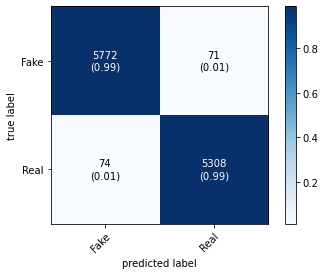

In [55]:
# Create new data, and run the algorithm
data2 = pd.concat([fk, real_copy], axis=0)
data2 = data2.sample(frac=1).reset_index(drop=True)
data2.drop('subject', axis=1)

FakeNewsDetection(data2['text'], data2['label'])

In [56]:
#Overall, the algorithm does slightly less well but still holds up very nicely!

In [57]:
#6. Conclusion

In [58]:
#In this notebook, I used the TfidfVectorizer and PassiveAggressiveClassifier algorithms to detect "fake news" in the dataset. If you found these interesting, I highly encourage you to do further research yourself!